# EDA : NBME - Score Clinical Patient Notes

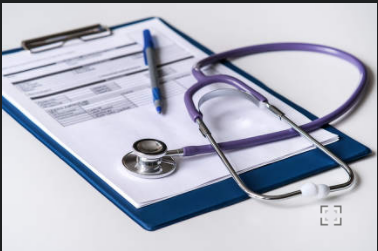

## About the dataset

### patient_notes.csv :

A collection of about 40,000 Patient Note history portions. Only a subset of these have features annotated. You may wish to apply unsupervised learning techniques on the notes without annotations. The patient notes in the test set are not included in the public version of this file.

##### pn_num - A unique identifier for each patient note.

##### case_num - A unique identifier for the clinical case a patient note represents.

##### pn_history - The text of the encounter as recorded by the test taker.

### features.csv :

The rubric of features (or key concepts) for each clinical case

##### feature_num - A unique identifier for each feature.

##### case_num - A unique identifier for each case.

##### feature_text - A description of the feature.

### train.csv :

Feature annotations for 1000 of the patient notes, 100 for each of ten cases.

##### id - Unique identifier for each patient note / feature pair.

##### pn_num - The patient note annotated in this row.

##### feature_num - The feature annotated in this row.

##### case_num - The case to which this patient note belongs.

##### annotation - The text(s) within a patient note indicating a feature. A feature may be indicated multiple times within a single note.

##### location - Character spans indicating the location of each annotation within the note. 

In [ ]:
# Imports

import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

from textblob import TextBlob
import seaborn as sns
from termcolor import colored
import random



In [ ]:
# Reading the files

patient_notes = pd.read_csv("../input/nbme-score-clinical-patient-notes/patient_notes.csv")
features = pd.read_csv("../input/nbme-score-clinical-patient-notes/features.csv")

train_data = pd.read_csv("../input/nbme-score-clinical-patient-notes/train.csv")

Now that we have loaded the files, let's have a look at them...

### Train.csv



In [ ]:
train_data.head()

In [ ]:
# Check no of cases in train

print(f'\033[94mNo of rows: ',train_data.shape[0])
print(f'\033[94mNo of different cases: ',len(train_data['case_num'].unique()))
print(f'\033[94mNo of different patient notes: ',len(train_data['pn_num'].unique()))

In [ ]:
# Plot patient notes per cases

train_data['case_num'].value_counts().plot(kind='barh')

#### Conclusion : Patient notes are unevenly available for different cases. Maximum for case_5 and minimum for case_7

In [ ]:
# Plot the distribution of predicted features per case

def features_plot(data):
    
    plot_dict = {}
    annotations = list(data['annotation'])
    features = list(data['feature_num'])
    
    for f in range(len(annotations)):
        
        feat = annotations[f]
        feat.replace('[','')
        feat.replace(']','')
        feat.replace('\'','')
        
        #print()
        
        if(features[f] in plot_dict.keys() and len(list(feat))>2):

            plot_dict[features[f]]+=1
            
        elif(features[f] not in plot_dict.keys() and len(list(feat))==2):
            
            plot_dict[features[f]]=0
            
        elif(features[f] not in plot_dict.keys() and len(list(feat))>2):
            
            plot_dict[features[f]]=1
            
        
                
                
    
        
    
        
    return plot_dict
    
        
    
    
            
    
    
        
        
        

In [ ]:
data = train_data[train_data['case_num']==5]
plot_dict = features_plot(data)
keys = list(plot_dict.keys())
# get values in the same order as keys, and parse percentage values
vals = [(plot_dict[k]) for k in keys]
sns.barplot(x=keys, y=vals)

#### Conclusion : Some features are more easily detected in patient notes compared to others.

Here are the feature distribution plots for all the cases present in dataset

In [ ]:
fig = plt.figure(figsize=(20,15))

a,b,c = 4,3,1


for val in train_data['case_num'].unique():
    
    data = train_data[train_data['case_num']==val]
    plot_dict = features_plot(data)
    keys = list(plot_dict.keys())
    # get values in the same order as keys, and parse percentage values
    vals = [(plot_dict[k]) for k in keys]
    plt.subplot(a, b, c)
    plt.title('Case Num : {}'.format(val))
    sns.barplot(x=keys, y=vals)
    c+=1

plt.show()

Speaking of features, let's look into features.csv

### Features.csv

In [ ]:
features.head()

In [ ]:
print(f'\033[94mNo of rows: ',features.shape[0])
print(f'\033[94mNo of different cases: ',len(features['case_num'].unique()))
print(f'\033[94mNo of different patient notes: ',len(features['feature_num'].unique()))

#### Plotting the wordcloud for all the features present across all cases

In [ ]:
text3 = ' '.join(list(features['feature_text']))
wordcloud2 = WordCloud().generate(text3)
# Generate plot
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

#### Plotting features for each case

In [ ]:
fig = plt.figure(figsize=(25,15))

a,b,c = 4,3,1


for val in features['case_num'].unique():
    
    
    data = features[features['case_num']==val]
    text3 = ' '.join(list(data['feature_text']))
    wordcloud2 = WordCloud().generate(text3)
    # Generate plot
    plt.subplot(a, b, c)
    plt.title('Case Num : {}'.format(val))
    c+=1
    plt.imshow(wordcloud2)
    plt.axis("off")
    
plt.show()
    
    

Let's see, how similar are our features to the actual patient notes, for the cases.

### patients_notes.csv

In [ ]:
patient_notes.head()

In [ ]:
print(f'\033[94mNo of rows: ',patient_notes.shape[0])
print(f'\033[94mNo of different cases: ',len(patient_notes['case_num'].unique()))
print(f'\033[94mNo of different patient notes: ',len(patient_notes['pn_num'].unique()))

In [ ]:
patient_notes['case_num'].value_counts().plot(kind='barh')

#### Conclusion : There are different numbers of patient notes per cases

In [ ]:
text3 = ' '.join(list(patient_notes['pn_history']))
wordcloud2 = WordCloud().generate(text3)
# Generate plot
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

#### Wordcloud of patient notes for each cases

In [ ]:
fig = plt.figure(figsize=(25,15))

a,b,c = 4,3,1


for val in patient_notes['case_num'].unique():
    
    
    data = patient_notes[patient_notes['case_num']==val]
    text = ' '.join(list(data['pn_history']))
    wordcloud2 = WordCloud().generate(text)
    # Generate plot
    plt.subplot(a, b, c)
    plt.title('Case Num : {}'.format(val))
    c+=1
    plt.imshow(wordcloud2)
    plt.axis("off")
    
plt.show()

#### Preparing the intersection of the train.csv and patient_notes.csv :

Plotting the analysis of the patient notes, for which feature annotations are present

In [ ]:
patient_train = pd.merge(left=train_data, right=patient_notes, left_on='pn_num', right_on='pn_num') 
patient_train = patient_train.drop(['case_num_y'],axis=1)

In [ ]:
patient_train.head()

In [ ]:
from termcolor import colored
import pprint

def annotate_text(data):
    
    row = data.iloc[0]
    #print(row)
    case_num = row['case_num_x']
    pn_num = row['pn_num']
    
    text = row['pn_history']
    pn_hist = ""
    #print(text)
    c = 0
    
    for i in range(len(text)):
        
        for annot in data['location']:
            
            if(' ' in annot):
                annot = annot[1:-1]
                annot = annot.replace('\'','')
                annot = annot.replace(';','')
                #print(annot)
                if(',' in annot):

                    ann = annot.split(',')
                    for a in ann:

                        nums = a.split(' ')
                        if('' in nums):
                            nums.remove('')
                        #print(nums)
                        if(i>=int(nums[0]) and i<=int(nums[1])):
                            
                            c = 1
                            break
                        
                            

                else:


                    nums = annot.split(' ')
                    #print(nums)
                    if(i>=int(nums[0]) and i<=int(nums[1])):
                        c = 1
                        
                        break
                    
            
        if(c==0):
            
            pn_hist+=text[i]
            
        if(c==1):
            
            pn_hist+=colored(text[i], 'red', attrs=['reverse', 'blink'])
        
        c = 0
            
                    
                    
    pn_hist = pn_hist.rstrip()
    print(pn_hist)

#### Random patient notes with annotations depicting the important features

In [ ]:
data = patient_train[patient_train['pn_num']==random.choice(patient_train['pn_num'])]
annotate_text(data)

##### This is kinda my first experience with an EDA notebook. Do leave suggestions for improvement and an upvote if you like it.

### Work in progress. To be continued...